In [2]:
import Bio
Bio.__version__

'1.79'

In [4]:
from Bio import SeqIO
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral

from IPython.display import Image, HTML

import random

Going through https://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

In [5]:
# A bit of code that will help us display the PDF output
def PDF(filename):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

# A bit of helper code to shorten long text
def head(text, lines=10):
    """ Print the first lines lines of the passed text.
    """
    print ('\n'.join(text.split('\n')[:lines] + ['[...]']))

In [6]:
# Kyoto Encyclopedia of Genes and Genomes
print(kegg_info("kegg").read())

kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 100.0+/09-30, Sep 21
                 Kanehisa Laboratories
                 pathway     820,318 entries
                 brite       289,366 entries
                 module          526 entries
                 orthology    24,620 entries
                 genome        7,850 entries
                 genes     37,714,543 entries
                 compound     18,844 entries
                 glycan       11,039 entries
                 reaction     11,605 entries
                 rclass        3,175 entries
                 enzyme        7,890 entries
                 network       1,541 entries
                 variant         455 entries
                 disease       2,507 entries
                 drug         11,735 entries
                 dgroup        2,382 entries



In [7]:
print(kegg_info("sey").read())

T01724           Salmonella enterica subsp. enterica serovar Typhimurium SL1344 KEGG Genes Database
sey              Release 100.0+/09-30, Sep 21
                 Kanehisa Laboratories
                 4,966 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 enzyme
                 ncbi-proteinid
                 uniprot



In [16]:
# Escherichia coli K-12 MG1655 KEGG Genes Database
sey_pathways = kegg_list('pathway', 'sey').read().strip().split("\n")
sey_pathways = [[k.split('\t')[0], k.split('\t')[1]] for k in sey_pathways]

In [30]:
kegg_get(sey_pathways[0][0]).read()

'ENTRY       sey00010                    Pathway\nNAME        Glycolysis / Gluconeogenesis - Salmonella enterica subsp. enterica serovar Typhimurium SL1344\nDESCRIPTION Glycolysis is the process of converting glucose into pyruvate and generating small amounts of ATP (energy) and NADH (reducing power). It is a central pathway that produces important precursor metabolites: six-carbon compounds of glucose-6P and fructose-6P and three-carbon compounds of glycerone-P, glyceraldehyde-3P, glycerate-3P, phosphoenolpyruvate, and pyruvate [MD:M00001]. Acetyl-CoA, another important precursor metabolite, is produced by oxidative decarboxylation of pyruvate [MD:M00307]. When the enzyme genes of this pathway are examined in completely sequenced genomes, the reaction steps of three-carbon compounds from glycerone-P to pyruvate form a conserved core module [MD:M00002], which is found in almost all organisms and which sometimes contains operon structures in bacterial genomes. Gluconeogenesis is a synth

In [15]:
len(sey_pathways)

120

In [23]:
[c[1] for c in sey_pathways if 'pyruvate' in c[1]]

[]

In [31]:
gmt_symbol = []
for pathway in sey_pathways:
    genes = []
    print(pathway[0])
    path_file = kegg_get(pathway[0]).read()
    current_section = None
    for line in path_file.rstrip().split("\n"):
        section = line[:12].strip()
        if not section == "":
            current_section = section
        if current_section == 'GENE':
            if ';' in line:
                gene_identifiers, gene_description = line[12:].split("; ")[0:2]
                gene_id, gene_symbol = gene_identifiers.split()
            else: 
                gene_id, gene_symbol = line[12:].strip().split()[0:2]
            if not gene_symbol in genes:
                genes.append(gene_symbol)
    gmt_symbol.append([pathway[0], pathway[1]] + genes)

path:sey00010
path:sey00020
path:sey00030
path:sey00040
path:sey00051
path:sey00052
path:sey00053
path:sey00061
path:sey00071
path:sey00130
path:sey00190
path:sey00220
path:sey00230
path:sey00240
path:sey00250
path:sey00260
path:sey00261
path:sey00270
path:sey00280
path:sey00281
path:sey00290
path:sey00300
path:sey00310
path:sey00330
path:sey00332
path:sey00340
path:sey00350
path:sey00360
path:sey00361
path:sey00362
path:sey00364
path:sey00380
path:sey00400
path:sey00401
path:sey00410
path:sey00430
path:sey00440
path:sey00450
path:sey00460
path:sey00470
path:sey00480
path:sey00500
path:sey00520
path:sey00521
path:sey00523
path:sey00525
path:sey00540
path:sey00541
path:sey00542
path:sey00550
path:sey00561
path:sey00562
path:sey00564
path:sey00565
path:sey00590
path:sey00592
path:sey00600
path:sey00620
path:sey00623
path:sey00625
path:sey00626
path:sey00627
path:sey00630
path:sey00633
path:sey00640
path:sey00650
path:sey00660
path:sey00670
path:sey00680
path:sey00730
path:sey00740
path:s

In [35]:
import pandas as pd
#gdf = pd.DataFrame(gmt)
gdf_symbol = pd.DataFrame(gmt_symbol).T

In [53]:
test_pathway = list(gdf_symbol.iloc[2: ,0].dropna().values)
test_pathway.remove("hypothetical")
test_pathway.remove('alcohol')
test_pathway

['glk',
 'pgi',
 'pfkA',
 'pfkB',
 'fbp',
 'glpX',
 'fbaB',
 'fba',
 'tpiA',
 'gapA',
 'pgk',
 'gpmA',
 'gpmB',
 'pmgI',
 'eno',
 'pykA',
 'pykF',
 'pps',
 'aceE',
 'aceF',
 'lpdA',
 'nifJ',
 'adhC',
 'adh',
 'adhP',
 'yjgB',
 'eutG',
 'aldB',
 'acs',
 'galM',
 'yihR',
 'agp',
 'yihX',
 'pgm',
 'yeaD',
 'pckA',
 'celF',
 'bglA',
 'crr',
 'ptsG',
 'PTS']

In [96]:
gdf.to_csv("./15-09-sey.gmt", sep="\t")
gdf_symbol.to_csv("./15-09-sey_symbol.gmt", sep="\t")

In [100]:
gdf.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
28,path:sey00361,Chlorocyclohexane and chlorobenzene degradatio...,SL1344_3921,SL1344_0327,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
82,path:sey00910,Nitrogen metabolism - Salmonella enterica subs...,SL1344_1507,SL1344_1693,SL1344_1692,SL1344_1508,SL1344_1691,SL1344_1509,SL1344_1689,SL1344_1511,...,None,None,None,None,None,None,None,None,None,None
8,path:sey00071,Fatty acid degradation - Salmonella enterica s...,SL1344_2997,SL1344_2358,SL1344_3935,SL1344_3936,SL1344_2357,SL1344_0833,SL1344_0305,SL1344_1747,...,None,None,None,None,None,None,None,None,None,None
111,path:sey03060,Protein export - Salmonella enterica subsp. en...,SL1344_3387,SL1344_4086,SL1344_3264,SL1344_0402,SL1344_0403,SL1344_0401,SL1344_3809,SL1344_0136,...,None,None,None,None,None,None,None,None,None,None
12,path:sey00230,Purine metabolism - Salmonella enterica subsp....,SL1344_3159,SL1344_3461,SL1344_4496,SL1344_0680,SL1344_1708,SL1344_2331,SL1344_4114,SL1344_2463,...,None,None,None,None,None,None,None,None,None,None


In [9]:
print(kegg_list('C01290+G00092').read())

cpd:C01290	Lactosylceramide; beta-D-Galactosyl-(1->4)-beta-D-glucosyl-(1<->1)-ceramide; beta-D-Galactosyl-1,4-beta-D-glucosylceramide; Gal-beta1->4Glc-beta1->1'Cer; LacCer; Lactosyl-N-acylsphingosine; D-Galactosyl-1,4-beta-D-glucosylceramide
gl:G00092	Lactosylceramide; LacCer; CD17; (Gal)1 (Glc)1 (Cer)1



In [ ]:
path:sey00640

In [149]:
for line in kegg_get("path:sey00190").read().split('\n'):
    if 'L24009' in line:
        print(line)

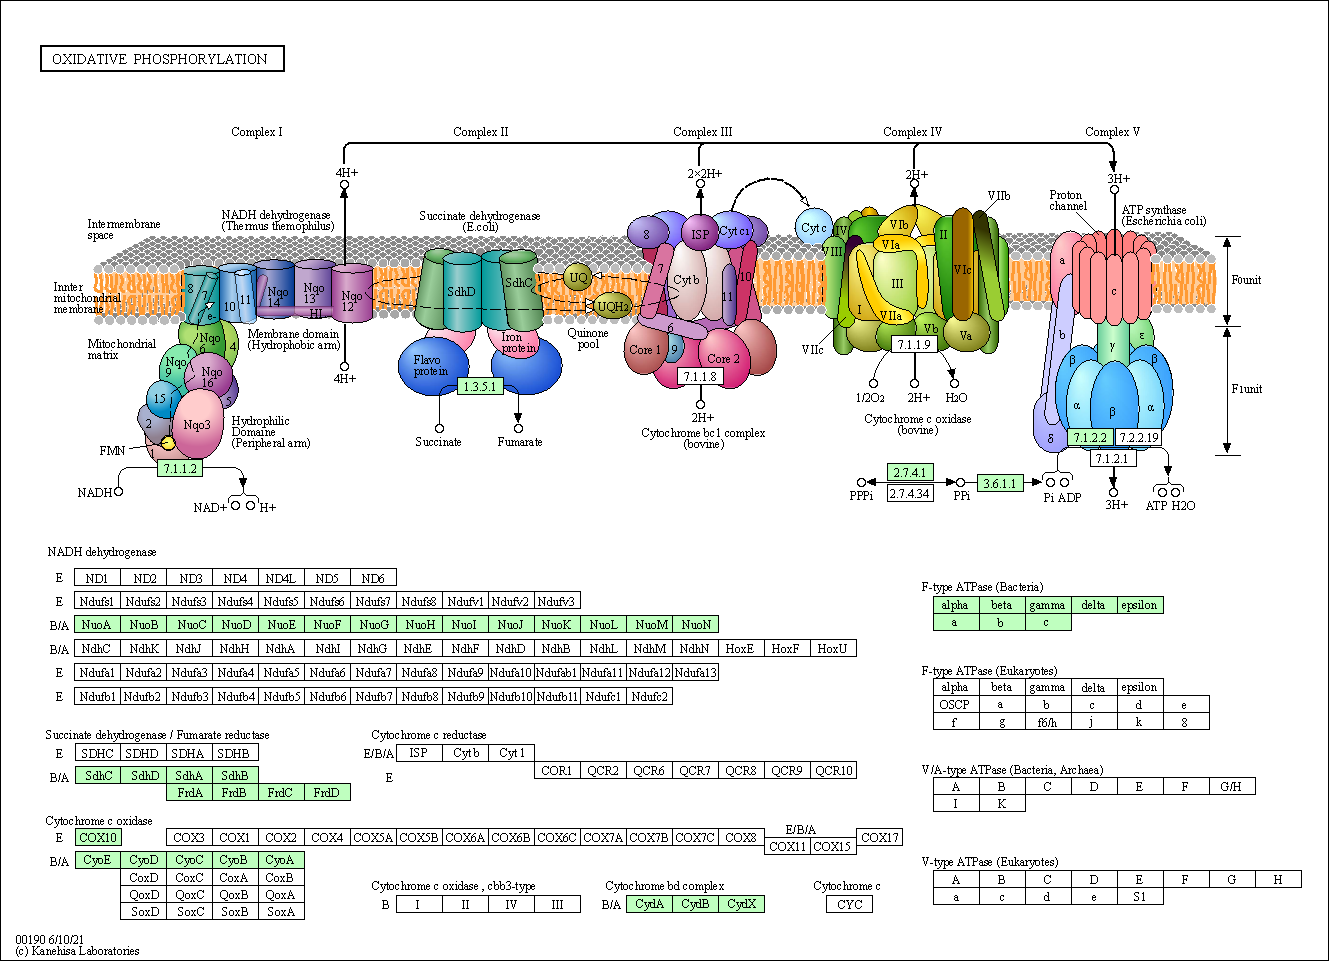

In [119]:
Image(kegg_get("sey00190", "image").read())

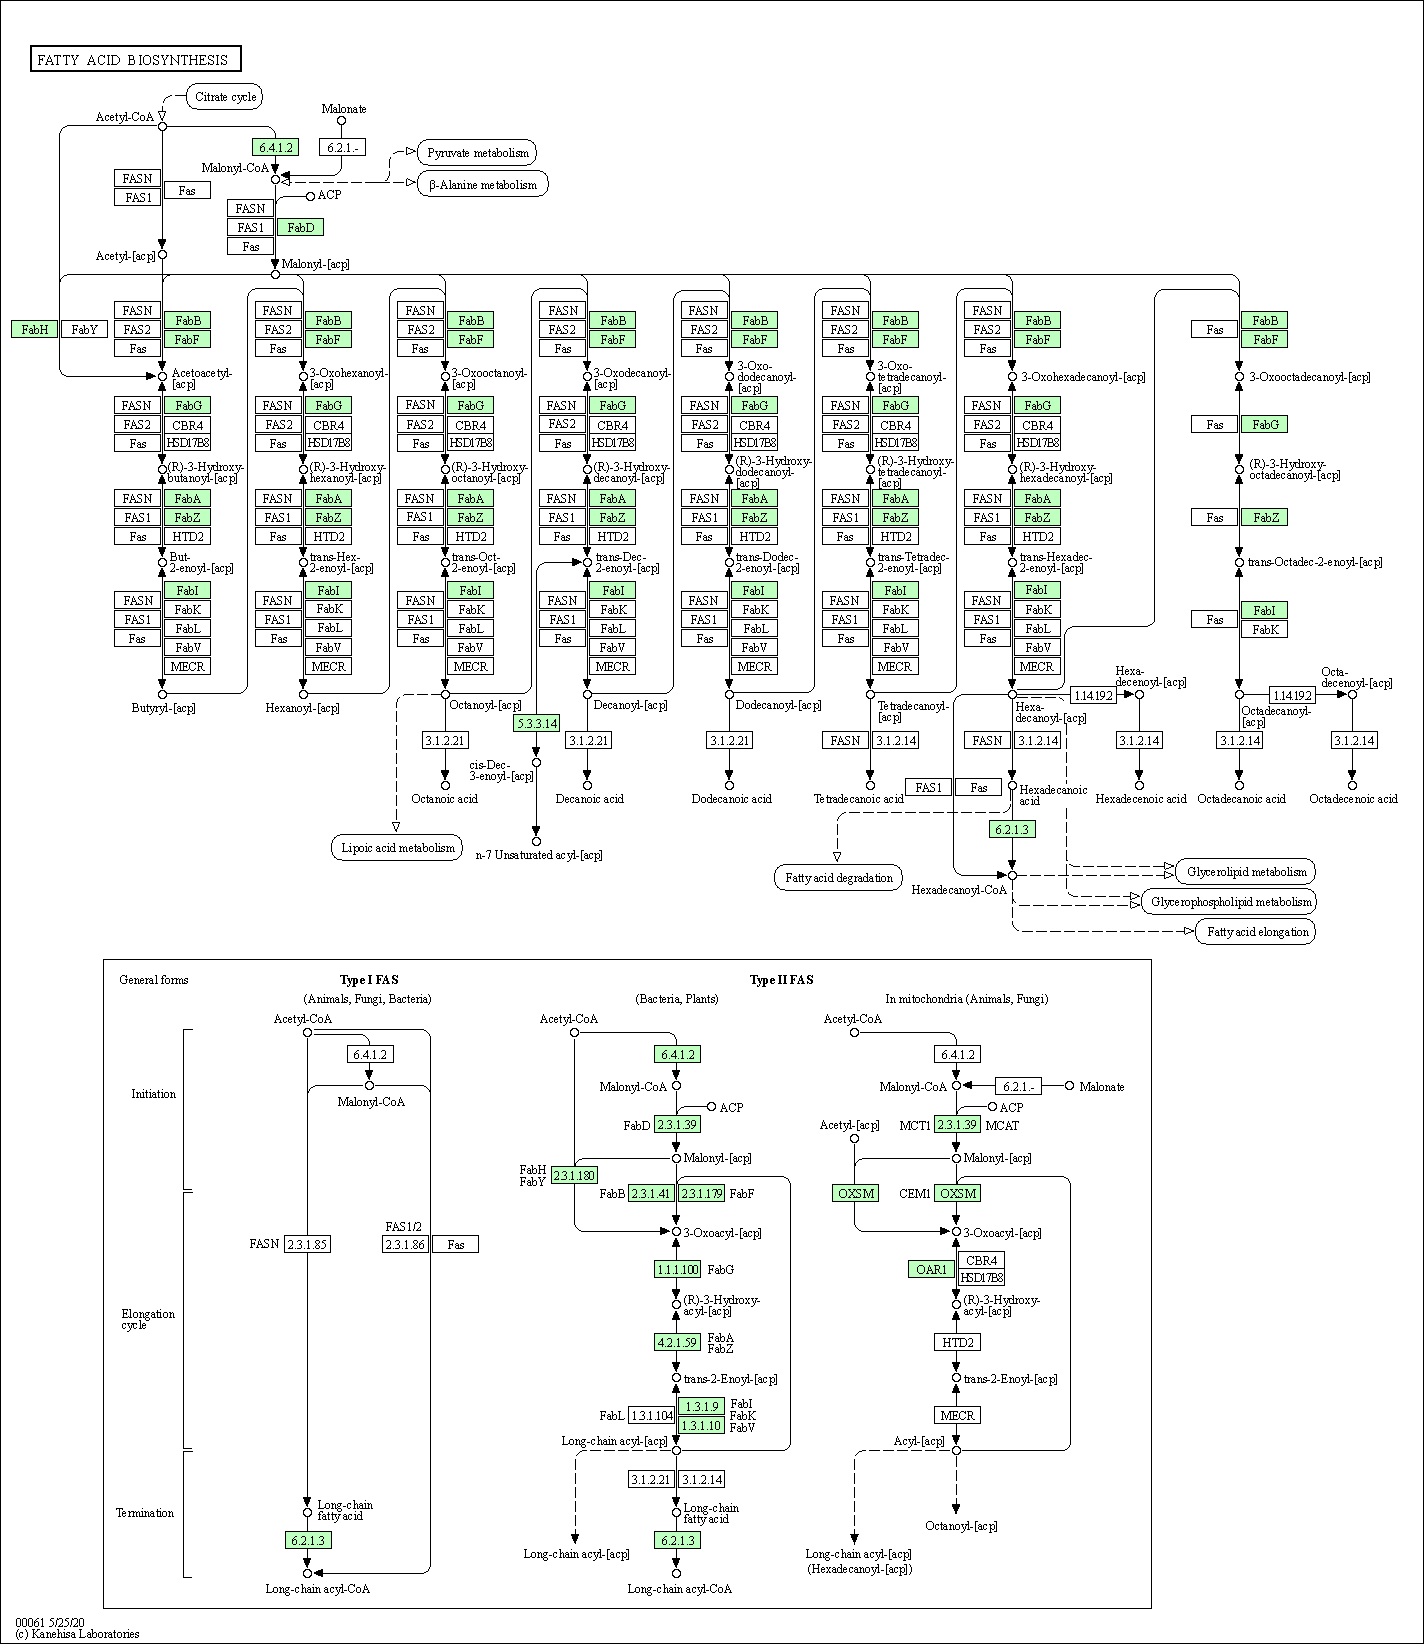

In [22]:
# What are these???
# Render reference fatty-acid biosynthesis
#Image(kegg_get("ko00061", "image").read()) #KEGG orthologes
Image(kegg_get("eco00061", "image").read()) # E.coli version
#Image(kegg_get("rn00061", "image").read())

In [123]:
pathway = KGML_parser.read(kegg_get("sey00190", "kgml"))
print(pathway)

Pathway: Oxidative phosphorylation
KEGG ID: path:sey00190
Image file: https://www.kegg.jp/kegg/pathway/sey/sey00190.png
Organism: sey
Entries: 223
Entry types:
	ortholog: 153
	gene: 44
	compound: 25
	map: 1



In [148]:
for o in pathway.orthologs:
    for a in o.graphics:
        if 'K00330' in a.name:
            print(a.bgcolor)
        print(a.name)

K02263
K03968
K03967
K03966
K03965
K03964
K03963
K03962
K03961
K03960
K03959
K03958
K03957
K03956
K03955
K03954
K03953
K03952
K03951
K03950
K03949
K03948
K03947
K03946
K03945
K03944
K03943
K03942
K03941
K03940
K03939
K03938
K03937
K03936
K03935
K03934
K05585
K05584
K05583
K05573
K05575
K05577
K05576
K05578
K05580
K05572
K05588
K05587
K05586
K05579
K05581
K05582
K05574
K03884
K03883
K03882
K03881
K03880
K03879
K03878
K02260
K02259
K02258
K02273
K02272
K02271
K02269...
K02268
K02826
K02827
K02828
K02829
K02275
K02274...
K02276...
K02277
K00410...
K00404...
K01542...
K01535
K00236
K00237
K00234
K00235
K00420
K00419
K00418
K00417
K00416
K00415
K00414
K00410...
K00410...
K00411...
K00406
K00407
K00405...
K00404...
K02267
K02266
K02265
K02264
K02261
K02256
K02262
K02142
K02133
K02132
K02136
K02137
K02134
K02135
K02128
K02126
K02127
K02129...
K02131...
K02130...
K02125
K02138
K02143
K02140
K02117
K02118
K02119
K02120
K02121
K02122
K02123
K02124
K02145
K02147
K02148
K02149
K02150
K02151
K02152

In [124]:
element = pathway.orthologs[1].graphics[0]
attrs = [element.name, element.x, element.y, element.coords, element.type, 
         element.width, element.height, element.fgcolor, element.bgcolor, 
         element.bounds, element.centre]
print ('\n'.join([str(attr) for attr in attrs]))

K03968
649.0
696.0
None
rectangle
46.0
17.0
#000000
#FFFFFF
[(626.0, 687.5), (672.0, 704.5)]
(649.0, 696.0)


In [135]:
orthologs = [e for e in pathway.orthologs]
for o in orthologs:
    for g in o.graphics:
        print(g.name)

K02263
K03968
K03967
K03966
K03965
K03964
K03963
K03962
K03961
K03960
K03959
K03958
K03957
K03956
K03955
K03954
K03953
K03952
K03951
K03950
K03949
K03948
K03947
K03946
K03945
K03944
K03943
K03942
K03941
K03940
K03939
K03938
K03937
K03936
K03935
K03934
K05585
K05584
K05583
K05573
K05575
K05577
K05576
K05578
K05580
K05572
K05588
K05587
K05586
K05579
K05581
K05582
K05574
K03884
K03883
K03882
K03881
K03880
K03879
K03878
K02260
K02259
K02258
K02273
K02272
K02271
K02269...
K02268
K02826
K02827
K02828
K02829
K02275
K02274...
K02276...
K02277
K00410...
K00404...
K01542...
K01535
K00236
K00237
K00234
K00235
K00420
K00419
K00418
K00417
K00416
K00415
K00414
K00410...
K00410...
K00411...
K00406
K00407
K00405...
K00404...
K02267
K02266
K02265
K02264
K02261
K02256
K02262
K02142
K02133
K02132
K02136
K02137
K02134
K02135
K02128
K02126
K02127
K02129...
K02131...
K02130...
K02125
K02138
K02143
K02140
K02117
K02118
K02119
K02120
K02121
K02122
K02123
K02124
K02145
K02147
K02148
K02149
K02150
K02151
K02152

In [56]:
# for orth in pathway.orthologs:
#     element = orth.graphics[0]
#     attrs = [element.name, element.x, element.y, element.coords, element.type, 
#          element.width, element.height, element.fgcolor, element.bgcolor, 
#          element.bounds, element.centre]
#     print ('\n'.join([str(attr) for attr in attrs]))

In [50]:
# Helper function to convert colour as RGB tuple to hex string
def rgb_to_hex(rgb):
    rgb = tuple([int(255*val) for val in rgb])
    return '#' + ''.join([hex(val)[2:] for val in rgb]).upper()

In [74]:
pathway = KGML_parser.read(kegg_get("sey00020", "kgml"))
canvas = KGMLCanvas(pathway, import_imagemap=True)


# Define arbitrary colours
colorspiral = ColorSpiral()
colorlist = colorspiral.get_colors(len(pathway.orthologs))

# Change the colours of ortholog elements
for color, element in zip(colorlist, pathway.orthologs):
    for graphic in element.graphics:
        graphic.bgcolor = rgb_to_hex(color)
        graphic.name = graphic.name.strip('...')

In [75]:
canvas = KGMLCanvas(pathway, import_imagemap=True)
canvas.draw("fab_map_new_colours.pdf")
PDF("fab_map_new_colours.pdf")

In [110]:
pathway = KGML_parser.read(kegg_get("sey00520", "kgml"))

# Change the widths of reaction entries elements
for element in pathway.orthologs:
    
    for graphic in element.graphics:
        print(graphic.name)
        print(graphic.type)
        print(graphic.width)
     #   graphic.width = random.randrange(1, 10, 1)

K01836
rectangle
46.0
K12409...
rectangle
46.0
K05304
rectangle
46.0
K01097
rectangle
46.0
K00621
rectangle
46.0
K02473
rectangle
46.0
K01654...
rectangle
46.0
K13015...
rectangle
46.0
K22925...
rectangle
46.0
K01787
rectangle
46.0
K15855
rectangle
46.0
K01183...
rectangle
46.0
K01452
rectangle
46.0
K01233
rectangle
46.0
K18676
rectangle
46.0
K00844
rectangle
46.0
K01183...
rectangle
46.0
K02765
rectangle
46.0
K00844
rectangle
46.0
K02474
rectangle
46.0
K00698
rectangle
46.0
K21749...
rectangle
46.0
K08080
rectangle
46.0
K08080
rectangle
46.0
K00326
rectangle
46.0
K21749...
rectangle
46.0
K13016...
rectangle
46.0
K13017
rectangle
46.0
K13018
rectangle
46.0
K13019
rectangle
46.0
K15894
rectangle
46.0
K15895
rectangle
46.0
K15896
rectangle
46.0
K15897
rectangle
46.0
K15898
rectangle
46.0
K15899
rectangle
46.0
K12451
rectangle
46.0
K12451
rectangle
46.0
K16190
rectangle
46.0
K18677
rectangle
46.0
K12450
rectangle
46.0
K08678
rectangle
46.0
K12448
rectangle
46.0
K00844
rectangle
46.0
K0097